In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
from numba import jit
from numba.typed import List

a = sys.path.append('../modules/')
a = sys.path.append('../codes/')

import prism, noise, plot_3D, auxiliars, salve_doc, derivative

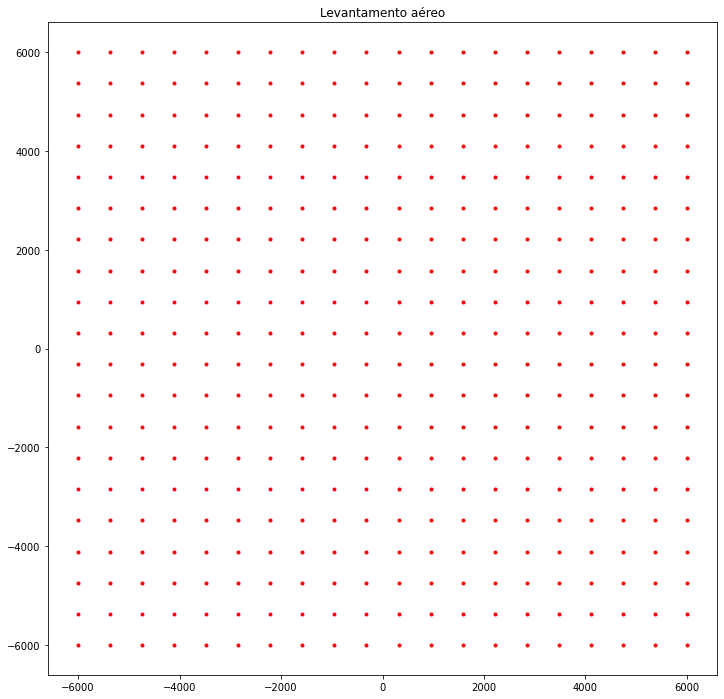

In [2]:
nx = 20 # n de observacoes na direcao x
ny = 20 # n de observacoes na direcao y
size = (nx, ny)

xmin = -6000.0 # KM
xmax = +6000.0 # KM
ymin = -6000.0 # KM
ymax = +6000.0 # KM
z = -50.0 #altura de voo, (com Z constante) em metros

dicionario = {'nx': nx,
                  'ny': ny,
                  'xmin': xmin,
                  'xmax': xmax,
                  'ymin': ymin,
                  'ymax': ymax,
                  'z': z,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**dicionario)
N = size[0]*size[1]

In [3]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Logfile/04_08_2022_12_31')
data_cubo = pd.read_table('data_mag.csv', sep=',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))

In [4]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-250.0, 250.0) 
y1,y2  = (-1000.0, 1000.0)
z1,z2  = (100, 1500.0)   # z eh positivo para baixo!
deltaz = 0.0
deltay = 0.0
deltax = 0.0
incl = 'positivo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'merg': y,
       'incl': 'positivo'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)

/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/../modules/plot_3D.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if merg == 'y':


/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/../modules/plot_3D.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = figure.gca(projection = '3d')
/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/../modules/plot_3D.py:55: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


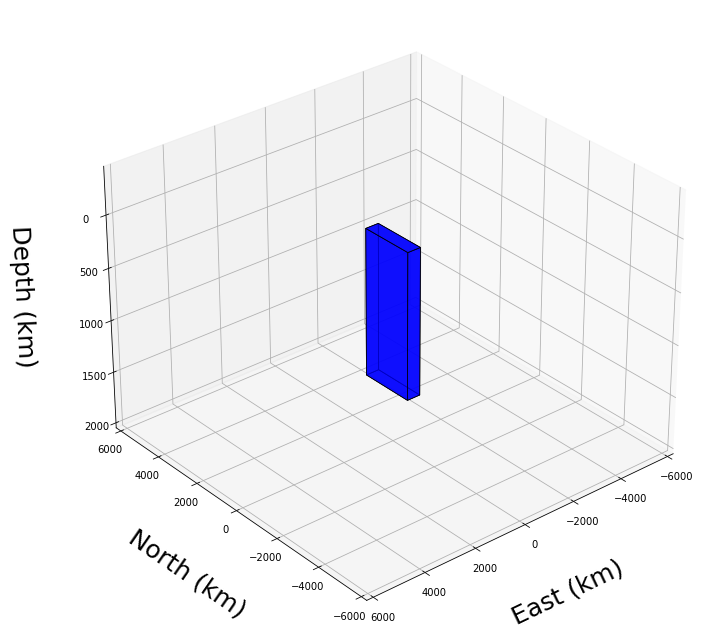

In [5]:
dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

vert1 =  plot_3D.vert_point(dic1)

color = 'b'
size = [9, 10]
view = [210,130]

prism_1 = plot_3D.plot_prism(vert1, color)

prisma1 = {'n': 1,
         'prisma': [prism_1]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

In [6]:
I = -33.0    # inclinacao do campo principal em graus
D = -44.0      # declinacao do campo principal em graus

# Propriedades magneticas da fonte crustal:
inc = 0.0 # magnetizacao puramente induzida
dec = 0.0 
Mi  = 6.0 # intensidade da magnetizacao em A/m
fonte_crustal_mag1 = [pointx[0], pointx[1], 
                     pointy[0], pointy[1],
                     pointz[0], pointz[1], Mi]

In [7]:
tfa1 = prism.prism_tf(X, Y,z, fonte_crustal_mag1, I, D, inc, dec)

In [8]:
noise_dsv = np.max(tfa1)
print(noise_dsv)
mi = 0.0
sigma = 5#*noise_dsv
print(sigma)

#ACTn = noise.noise_gaussiana(t, mi, sigma, ACT)
tfa_final = auxiliars.noise_normal_dist(tfa1, mi, sigma)

552.5654043078077
27.628270215390387


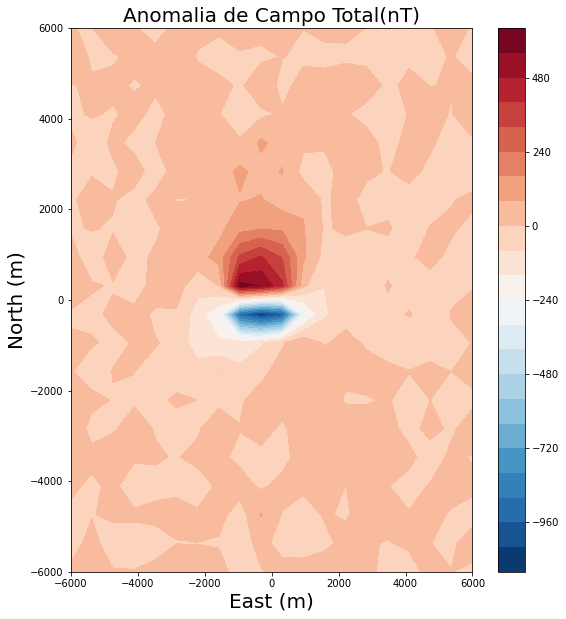

In [9]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, tfa_final, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


In [10]:
"""delta = 10.

dx_act = (prism.prism_tf(X + delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X - delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

dy_act = (prism.prism_tf(X, Y + delta, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y - delta, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

dz_act = (prism.prism_tf(X, Y, Z + delta, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y, Z - delta, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)
"""

'delta = 10.\n\ndx_act = (prism.prism_tf(X + delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec) -           prism.prism_tf(X - delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)\n\ndy_act = (prism.prism_tf(X, Y + delta, Z, fonte_crustal_mag1, I, D, inc, dec) -           prism.prism_tf(X, Y - delta, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)\n\ndz_act = (prism.prism_tf(X, Y, Z + delta, fonte_crustal_mag1, I, D, inc, dec) -           prism.prism_tf(X, Y, Z - delta, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)\n'

In [11]:
eta = [1., 2., 3.]
#Indice estrutural do dike


In [12]:
"""B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))
A = np.hstack((np.reshape(dx_act, (N, 1)), 
               np.reshape(dy_act, (N, 1)), 
               np.reshape(dz_act, (N, 1)), 
               np.zeros((N,1)) + eta))"""

'B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))\nA = np.hstack((np.reshape(dx_act, (N, 1)), \n               np.reshape(dy_act, (N, 1)), \n               np.reshape(dz_act, (N, 1)), \n               np.zeros((N,1)) + eta))'

In [13]:
"""result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))"""

'result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))'

In [14]:
"""print(result[0], result[1], result[2], result[3])"""

'print(result[0], result[1], result[2], result[3])'

In [15]:
"""ff = [0., 0.5, 1., 2., 3.]
print(len(ff))
zero = np.zeros((4, 4))
print(zero)"""

'ff = [0., 0.5, 1., 2., 3.]\nprint(len(ff))\nzero = np.zeros((4, 4))\nprint(zero)'

In [16]:
def matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta, tfa_final, N):
    A, B = 0., 0.
    B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))
    A = np.hstack((np.reshape(dx_act, (N, 1)), 
            np.reshape(dy_act, (N, 1)), 
            np.reshape(dz_act, (N, 1)), 
            np.zeros((N,1)) + eta))
    return A, B

In [17]:
def Euler_calc(X, Y, Z, fonte_crustal_mag1, I, D, inc, dec, tfa_final, eta, N):
    
    n = len(eta)
    #Calculo das derivadas espaciais
    delta = np.abs(X[0][0] - X[0][1])*0.1

    dx_act = (prism.prism_tf(X + delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X - delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

    dy_act = (prism.prism_tf(X, Y + delta, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y - delta, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

    dz_act = (prism.prism_tf(X, Y, Z + delta, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y, Z - delta, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)
    
    #Calculo da Deconvolução de Euler
    final_result = np.zeros((4, n))
    for i in range(n):
        A, B = matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta[i], tfa_final, N)
        result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))
        final_result[0, i], final_result[1, i], final_result[2, i], final_result[3, i]  = result[0], result[1], result[2], result[3]
    
    return final_result

In [18]:
final_result = Euler_calc(X, Y, Z, fonte_crustal_mag1, I, D, inc, dec, tfa_final, eta, N)

In [19]:
print(final_result)

[[-296.46491734  -92.62908711  111.20674311]
 [ 135.97365388  324.33258096  512.69150804]
 [ 249.51836043  277.04287984  304.56739924]
 [  -2.81176146    0.7531272     1.94142342]]


In [20]:
def Euler_calc_real(X, Y, Z, tfa_final, eta, N):
    
    n = len(eta)
    #Calculo das derivadas espaciais
    delta = np.abs(X[0][0] - X[0][1])*0.1

    dx_act = np.reshape(derivative.my_xderiv(X, Y, tfa_final, n = 1), (20,20))

    dy_act = np.reshape(derivative.my_yderiv(X, Y, tfa_final, n = 1), (20,20))

    dz_act = np.reshape(derivative.my_zderiv(X, Y, tfa_final, n = 1), (20,20))
    
    #Calculo da Deconvolução de Euler
    final_result = np.zeros((4, n))
    for i in range(n):
        A, B = matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta[i], tfa_final, N)
        result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))
        final_result[0, i], final_result[1, i], final_result[2, i], final_result[3, i]  = result[0], result[1], result[2], result[3]
    
    return final_result

In [21]:
final_result_ = Euler_calc_real(X, Y, Z, tfa_final, eta, N)
print(final_result_)

[[ -15.92707842  -15.92707842  -15.92707842]
 [-281.80602785 -281.80602785 -281.80602785]
 [ 218.36112089  500.69597355  783.03082622]
 [   1.314874      1.314874      1.314874  ]]
